In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("Advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
print("Shape:", df.shape)
print("\nInfo:")
df.info()

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Clean up column names (remove spaces)
df.columns = df.columns.str.strip()
print("\nColumn names after strip:", df.columns.tolist())

Shape: (20, 4)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         20 non-null     float64
 1   Radio      20 non-null     float64
 2   Newspaper  20 non-null     float64
 3   Sales      20 non-null     float64
dtypes: float64(4)
memory usage: 772.0 bytes

Missing Values:
 TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

Column names after strip: ['TV', 'Radio', 'Newspaper', 'Sales']


In [5]:
df.describe()


,TV,Radio,Newspaper,Sales
count,20.000000,20.000000,20.000000,20.00000
mean,119.310000,27.740000,42.010000,13.49500
std,84.178425,15.442573,29.596797,5.43289
min,8.600000,2.100000,1.000000,4.80000
25%,54.250000,17.400000,18.900000,9.60000
50%,108.850000,32.850000,45.550000,12.15000
75%,196.500000,39.375000,60.350000,17.67500
max,281.400000,48.900000,114.000000,24.40000


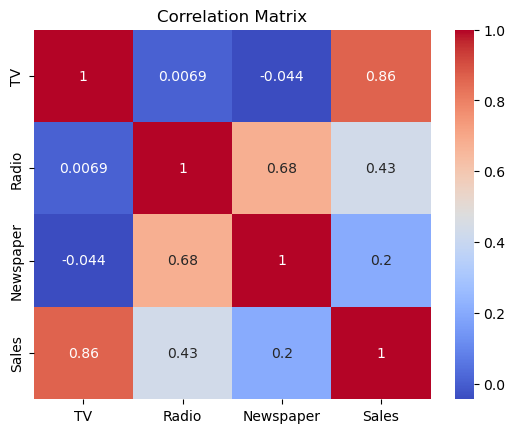

In [6]:
import os
import re

os.makedirs("images", exist_ok=True)
plot_title = "Correlation Matrix"
filename = re.sub(r'[^A-Za-z0-9]+', '_', plot_title.lower()) + ".png"

sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title(plot_title)

plt.savefig(f"images/{filename}", dpi=300, bbox_inches='tight')
plt.show()

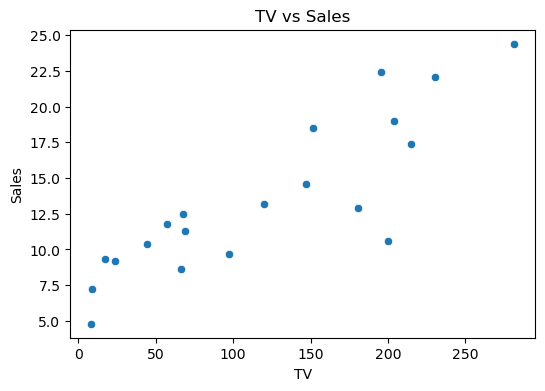

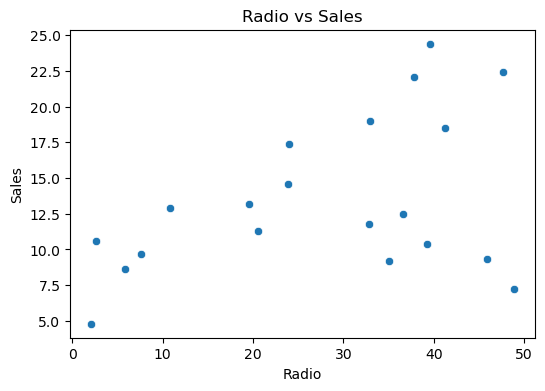

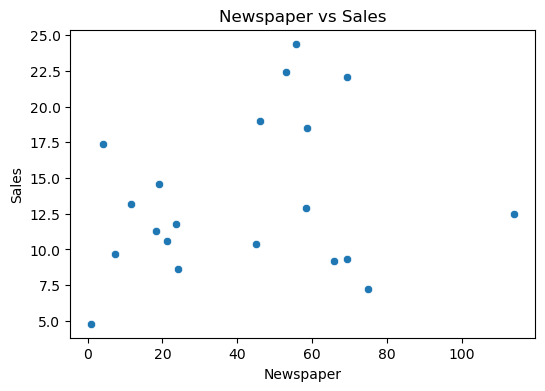

In [7]:
features = ['TV', 'Radio', 'Newspaper']

for feature in features:
    os.makedirs("images", exist_ok=True)
    plot_title = f"{feature} vs Sales"
    filename = re.sub(r'[^A-Za-z0-9]+', '_', plot_title.lower()) + ".png"
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=df[feature], y=df['Sales'])
    plt.title(plot_title)
    plt.xlabel(feature)
    plt.ylabel("Sales")
    plt.savefig(f"images/{filename}", dpi=300, bbox_inches='tight')
    plt.show()

In [8]:
X = df[['TV', 'Radio', 'Newspaper']]

# Target (dependent variable)
y = df['Sales']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
model = LinearRegression()
model.fit(X_train, y_train)

# Coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: 3.7751368984157203
Coefficients: [ 0.0495278   0.15278454 -0.01687836]


In [11]:
y_pred = model.predict(X_test)

In [12]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

MAE: 1.82
RMSE: 1.94
R² Score: 0.88


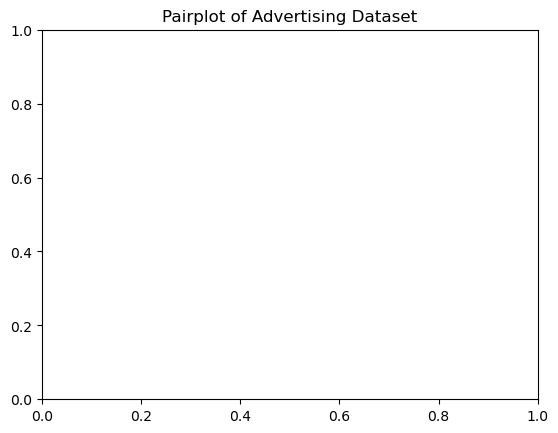

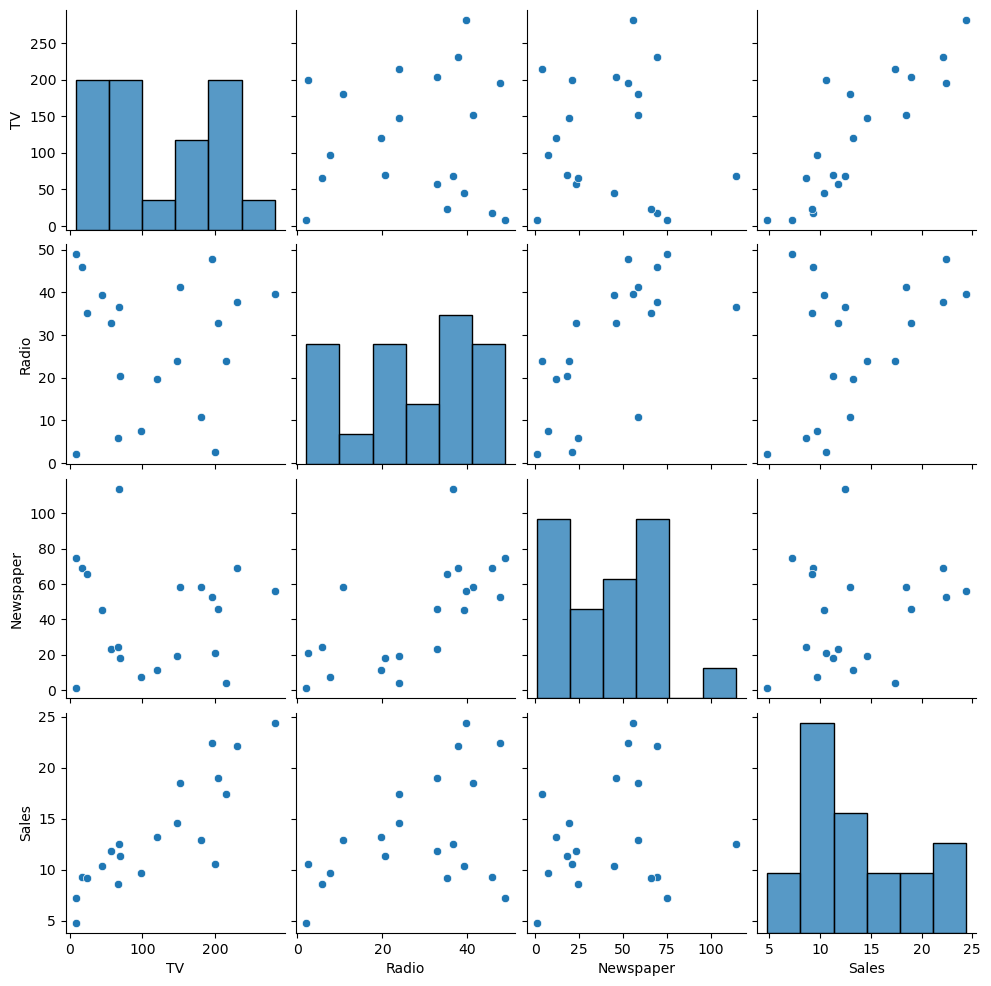

In [14]:
os.makedirs("images", exist_ok=True)
plot_title = "Pairplot of Advertising Dataset"
filename = re.sub(r'[^A-Za-z0-9]+', '_', plot_title.lower()) + ".png"

plt.title(plot_title)
sns.pairplot(df)

plt.savefig(f"images/{filename}", dpi=300, bbox_inches='tight')
plt.show()

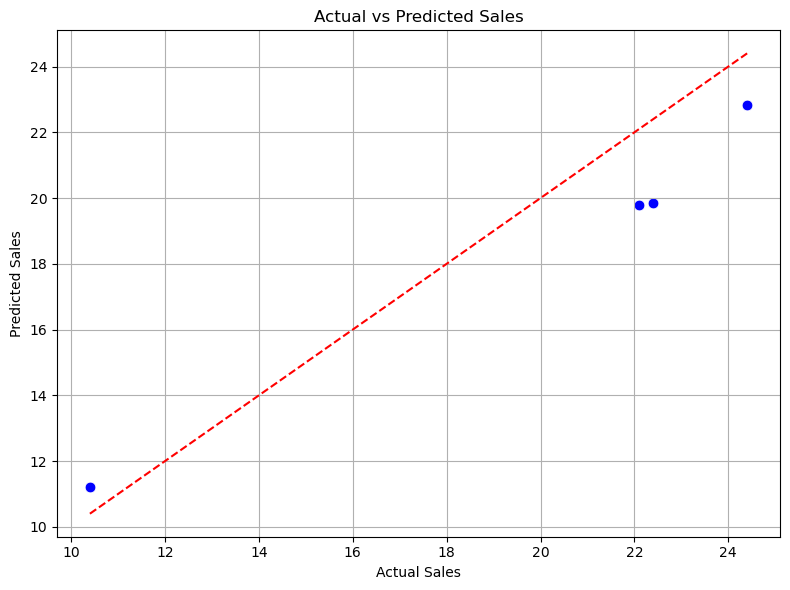

In [15]:
os.makedirs("images", exist_ok=True)
plot_title = "Actual vs Predicted Sales"
filename = re.sub(r'[^A-Za-z0-9]+', '_', plot_title.lower()) + ".png"

# Actual vs Predicted
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, color="blue", s=60)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title(plot_title)
plt.grid(True)
plt.tight_layout()
plt.savefig(f"images/{filename}", dpi=300, bbox_inches='tight')
plt.show()
